# Exercise 6.5 Unsupervised Machine Learning: Clustering
## House Sales

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Task Directions (Importing Library & Data & Renaming Columns)
#### 1. Install and import all necessary libraries in your Jupyter notebook.
#### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
- Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
- Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy 
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

# Here is where you import the k-means algorithm from scikit-learn.
from sklearn.cluster import KMeans 

# PyLab is a convenience module that bulk imports matplotlib.
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline


In [3]:
# Imported path
path = '/Users/peterkim/Document/sql/CareerFoundry/Immersion Prep/6. Advanced Analytics & Dashboard Design/House Sales in KC Analysis'


In [4]:
# Import the King County House data
df_haus = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_haus_cleaned.csv'), index_col = False)


In [5]:
df_haus.shape


(21613, 16)

In [6]:
df_haus.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178
1,1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125
2,2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028
3,3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136
4,4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074


In [7]:
# Delete unnecessary column
df_haus = df_haus.drop(columns=['Unnamed: 0'])
df_haus = df_haus.drop(columns=['id'])
df_haus = df_haus.drop(columns=['zipcode'])


### Task Directions (The Elbow Technique)
#### 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.
#### 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
- Explain why you chose that number in a markdown cell.
- If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

### 2. The elbow technique

In [8]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 


In [9]:
# Creates a score that represents 
# number a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_haus).score(df_haus) for i in range(len(kmeans))] 

score

/Users/peterkim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peterkim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peterkim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peterkim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

[-2950442710250201.0,
 -1392074936203838.5,
 -767570250651035.1,
 -497965548663949.5,
 -361418722500112.6,
 -274701968549076.6,
 -216255127021818.44,
 -172851838307087.12,
 -147319386762912.8]

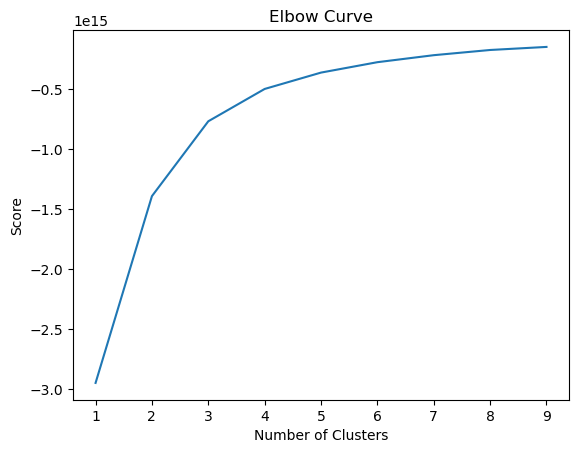

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from one to three on the x-axis, but after that, the curve shows a gentle slope. This means that the optimal count for your clusters is three.

### Task Directions (k-means clustering)
#### 5. Run the k-means algorithm.
#### 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.
#### 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

### 3. k-means clustering

In [11]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) # , n_jobs = -0.25) 


In [12]:
# Fit the k-means object to the data.
kmeans.fit(df_haus)


/Users/peterkim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [13]:
df_haus['clusters'] = kmeans.fit_predict(df_haus)


/Users/peterkim/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
df_haus.head(40)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,clusters
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,1
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,1
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,1
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,0
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,1
5,20140512,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,2001,0,0
6,20140627,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1995,0,1
7,20150115,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1963,0,1
8,20150415,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1960,0,1
9,20150312,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,2003,0,1


In [15]:
# Saving and exporting df_haus_cleaned to df_haus_cleaned_clustered.csv
df_haus.to_csv(os.path.join(path, '02 Data','prepared data', 'df_haus_cleaned_clustered.csv'))


In [16]:
df_haus['clusters'].value_counts()

clusters
1    15090
0     5919
2      604
Name: count, dtype: int64

In [17]:
# Assuming df_haus contains only numeric columns
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to represent the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df_haus.columns[:-1])  # Exclude the 'clusters' column

# Display the cluster centers
print(cluster_centers_df)


           date         price  bedrooms  bathrooms  sqft_living      sqft_lot  \
0  2.014391e+07  8.094840e+05  3.735578   2.517594  2723.613940  19678.579597   
1  2.014389e+07  3.749856e+05  3.193734   1.902669  1737.757518  12783.182342   
2  2.014418e+07  2.030683e+06  4.178808   3.473924  4332.662252  28454.170530   

     floors  waterfront      view  condition      grade     yr_built  \
0  1.672560    0.010489  0.453392   3.457452   8.525123  1972.288445   
1  1.409756    0.001391  0.096503   3.387601   7.212876  1970.338323   
2  1.863411    0.132450  1.534768   3.485099  10.258278  1975.114238   

   yr_renovated  
0    129.533412  
1     58.594847  
2    287.829470  


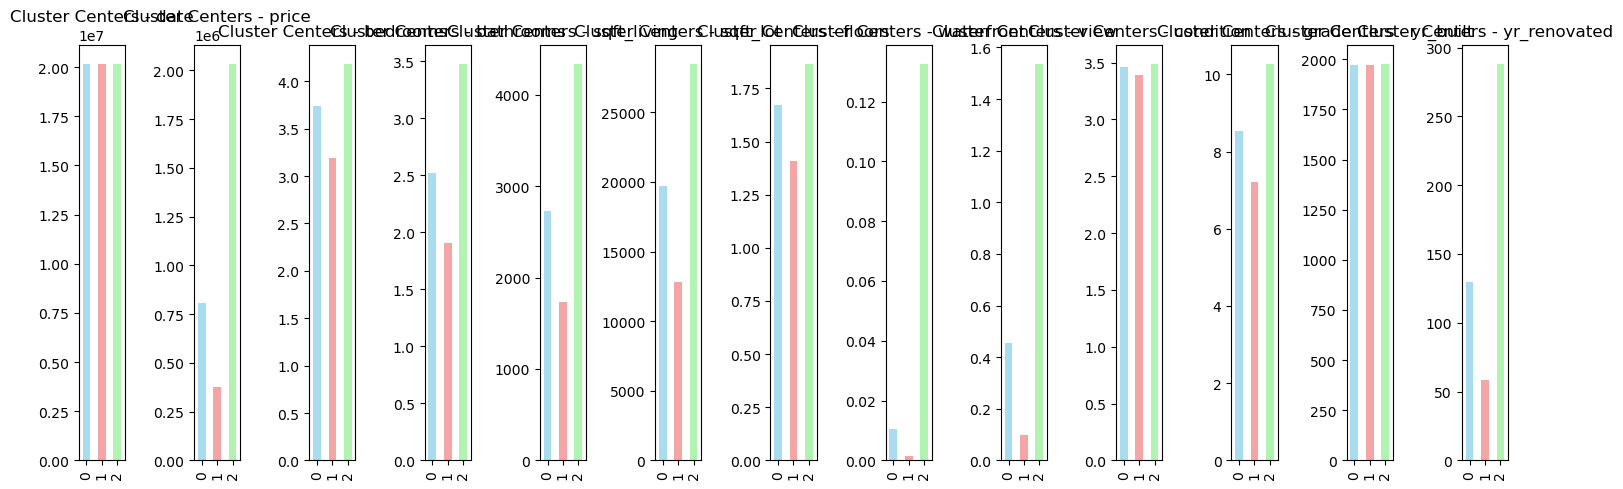

In [19]:
# Assuming cluster_centers_df is your DataFrame containing cluster centers

# Set the number of subplots based on the number of variables
num_variables = len(cluster_centers_df.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_variables, figsize=(15, 5))  # Adjust figsize as needed

# Iterate through each variable and create a bar chart
for i, variable in enumerate(cluster_centers_df.columns):
    cluster_centers_df[variable].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.7)
    axes[i].set_title(f'Cluster Centers - {variable}')

plt.tight_layout()
plt.show()


In [21]:
# Extract data from the cluster_centers_df DataFrame
cluster_centers_data = cluster_centers_df.transpose()

# Save the data to a CSV file
cluster_centers_data.to_csv(os.path.join(path, '02 Data','prepared data', 'df_haus_cleaned_clustered.csv'))

# Display the data
print(cluster_centers_data)


                         0             1             2
date          2.014391e+07  2.014389e+07  2.014418e+07
price         8.094840e+05  3.749856e+05  2.030683e+06
bedrooms      3.735578e+00  3.193734e+00  4.178808e+00
bathrooms     2.517594e+00  1.902669e+00  3.473924e+00
sqft_living   2.723614e+03  1.737758e+03  4.332662e+03
sqft_lot      1.967858e+04  1.278318e+04  2.845417e+04
floors        1.672560e+00  1.409756e+00  1.863411e+00
waterfront    1.048892e-02  1.390913e-03  1.324503e-01
view          4.533920e-01  9.650285e-02  1.534768e+00
condition     3.457452e+00  3.387601e+00  3.485099e+00
grade         8.525123e+00  7.212876e+00  1.025828e+01
yr_built      1.972288e+03  1.970338e+03  1.975114e+03
yr_renovated  1.295334e+02  5.859485e+01  2.878295e+02


In [ ]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_haus['sqft_living'], y=df_haus['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Size of Living Area') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()


In [ ]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_haus['yr_built'], y=df_haus['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year of Built') 
plt.ylabel('Price') 
plt.show()

### Task Directions
#### 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
- Note down your thoughts in a markdown cell.
#### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.
#### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

#### In the first plot, 
the data points are grouped into clusters based on the size of the living area and price. The clusters represent different size of the living area of the house with corresponding price ranges. These clusters make sense because there is a strong correlation between the size of the living area of the house and its price.

#### In the second plot, 
the clusters are formed based on the year the house was built and its price. This indicates that properties are grouped into categories by age, with older homes, mid-aged homes, and newly built properties having different price ranges. Mid-to low-priced clusters are evenly distributed regardless of the age of the house. However, the groups of houses built after 1980 are distributed densely in an expensive area.


In [ ]:
df_haus.loc[df_haus['clusters'] == 2, 'cluster'] = 'dark purple'
df_haus.loc[df_haus['clusters'] == 1, 'cluster'] = 'pink'
df_haus.loc[df_haus['clusters'] == 0, 'cluster'] = 'yellow'

In [ ]:
df_haus.groupby('cluster').agg({'grade':['mean', 'median'], 
                                'yr_built':['mean', 'median'], 
                                'sqft_living':['mean', 'median'],
                                'price':['mean', 'median']})

#### Using the statistical data presented, we can construct a structured table (below) that categorizes grades, ages, and prices. This table can serve the purpose of offering informed guidance to prospective customers in their purchasing decisions or be utilized for marketing strategies.

#### With additional columns and implementing grouping with more details, we can develop more precise and detailed guideline tools to enhance analytical capabilities.



#### High Budget (Dark Purple)
- Grade: 10
- Built Year: 1980's & Older
- Price: About $1,000,000 & Over

#### Mid Budget (Pink)
- Grade: 8
- Built Year: Mid & Late of 1970's
- Price: Between $500,000's & $900,000's

#### Low Budget (Yellow)
- Grade: 7
- Built Year: Early of 1970's & Younger
- Price: About $400,000's & Below